In [16]:
# Loading Data.
import pandas as pd
import numpy as np
from sklearn.utils import shuffle


train = pd.read_csv("train.csv", index_col=None)
train = shuffle(train)

train.head(10)


,Class,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
785,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
271,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
68,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
901,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
560,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
251,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
192,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
909,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X, Y = train.iloc[:,1:], train["Class"]

input_len, input_sz = X.shape[0], X.shape[1]

train_frac = 0.75
sep = int(input_len*train_frac)

X_train, y_train = X.iloc[:sep,:], Y.iloc[:sep]
X_test, y_test  = X.iloc[sep:,:],  Y.iloc[sep:]

print("Shape of training:")
print("X:", X_train.shape, "y:", y_train.shape)
print("Shape of testing:")
print("X:", X_test.shape, "y:", y_test.shape)

Shape of training:
X: (750, 1024) y: (750,)
Shape of testing:
X: (250, 1024) y: (250,)


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=0.2)
bnb.fit(X_train, y_train)

# print("Number of mislabeled points out of a total %d points : %d"
#       % (iris.data.shape[0],(iris.target != y_pred).sum()))

BernoulliNB(alpha=0.2, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def ROC_AUC(y_test, y_prob):
    mean_acc = 0.0
    mean_auc = 0.0
    all_tpr = []
    all_acc = []
    all_auc = []
    print(y_test.shape, y_prob.shape)
    i=0
    # Get prediction on class label from the model
    y_prediction = np.around(y_prob, decimals=0)
    
    # Get probability output from the model
    acc = np.sum(y_test == y_prediction)*1./len(y_test)
    print("Prediction accuracy:", acc)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print("Area under ROC curve (AUC):", roc_auc)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))    
    all_acc.append(acc)
    all_auc.append(roc_auc)

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))#, label='Luck')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    all_acc=np.asarray(all_acc)
    all_auc=np.asarray(all_auc)
    print(all_acc)
    # print 95% C.I. for both accuracy and AUC based on CV
    print("Mean Accuracy: %0.3f (+/- %0.3f)" % (all_acc.mean(), all_acc.std() * 1.96))
    print(all_auc)
    print("Mean AUC: %0.3f (+/- %0.3f)" % (all_auc.mean(), all_auc.std() * 1.96))

(250,) (250,)
Prediction accuracy: 0.856
Area under ROC curve (AUC): 0.8654613360495713


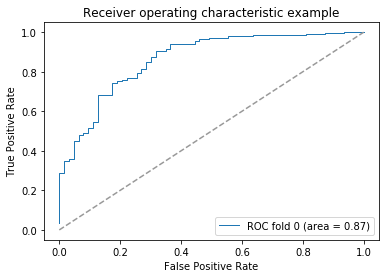

[0.856]
Mean Accuracy: 0.856 (+/- 0.000)
[0.86546134]
Mean AUC: 0.865 (+/- 0.000)


In [20]:
y_pred = bnb.predict_proba(X_test)[:,1]

ROC_AUC(y_test, y_pred)